# Exercise - Simple Linear Regression with PyTorch

## Table of Contents
* [Introduction](#Introduction)
* [Requirements](#Requirements) 
  * [Knowledge](#Knowledge) 
  * [Modules](#Python-Modules)
* [Training Data](#Training-Data)
* [Exercises - Simple Linear Regression](#Exercise---Simple-Linear-Regression)
  * [Model](#Model)
  * [Cost Function](#Cost-Function)
  * [Computing the Gradient](#Computing-the-Gradient)
  * [Training-the-Model](#Training-the-Model)
  * [Evaluation](#Evaluation)  
  * [Using PyTorchs Built-Ins](#Using-PyTorchs-Built-Ins)
* [Summary and Outlook](#Summary-and-Outlook) 
* [Literature](#Literature) 
* [Licenses](#Licenses)

## Introduction
Linear Regression is the _Hello World_ of Machine Learning. In this exercise you will implement a _simple linear regression (univariate linear regression)_, a model with one predictor and one response variable. The goal is to recap and practice fundamental concepts of Machine Learning aswell as practice the usage of the deep learning framework _PyTorch_. Steps in this exercise:

1. Implement a linear function as hypothesis (model) 
2. Write a function to quantify your model (cost function)
3. Learn to visualize the cost function
4. Rescale your input features
5. Implement the gradient descent algorithm to train your model (optimizer) 
6. Visualize your training process and results
7. Replace self written functions for linear hypothesis, costs and optimizer with PyTorch Built-Ins

## Requirements
### Knowledge
You should have a basic knowledge of Machine Learning models, cost functions, optimization algorithms and also numpy and matplotlib. We will only recap these concepts for a better understanding and do not explain them in great detail. Suitable sources for acquiring this knowledge are:
- [Simple Linear Regression Notebook](http://christianherta.de/lehre/dataScience/machineLearning/basics/univariate-linear-regression.php) by Christian Herta and his [lecture slides](http://christianherta.de/lehre/dataScience/machineLearning/linearRegression.pdf) (German)
- Chapter 5.1 of [Deep Learning](http://www.deeplearningbook.org/contents/ml.html) by Ian Goodfellow 
- Some parts of chapter 1 and 3 of [Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book) by Christopher M. Bishop
- [numpy quickstart](https://docs.scipy.org/doc/numpy-1.15.1/user/quickstart.html)
- [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)
- [PyTorch quickstart tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

### Python Modules

By [deep.TEACHING](https://www.deep-teaching.org/) convention, all python modules needed to run the notebook are loaded centrally at the beginning. 


In [ ]:
# Import Numpy & PyTorch
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from mpl_toolkits.mplot3d.axes3d import Axes3D

## Trianing Data

First, let us generate some training data:

- $m$-Training data $\mathcal D = \{(\vec x^{(1)}, y^{(1)}),(\vec x^{(2)},y^{(2)}), \dots (\vec x^{(m)},y^{(m)})\}$

here with
 - $m=100$ training data
 - one feature $x \in [0, 10]$
 - one target value (float): $y = 5 + 2 \cdot x + \eta$
 - gaussian noise $\eta$
 
Note that in reality, we do not know the true target function. If we did, we already knew the perfect model and  did not have to find one.

In [ ]:
### seed for reproducability
np.random.seed(42)

m = 100
X = np.random.uniform(low=0, high=10, size=(m))

### convert from float64 to float32 for various reasons:
### speedup, less memory usage, precision is enough.
### when using GPU, fp16, fp32 or fp64 depends on
### type of GPU (consumer/workstation/server).
X = np.array(X, dtype=np.float32) 

print(X.shape)
print(X.dtype)

In [ ]:
def true_target_function(x):
    bias = 5
    slope = 2
    noise = np.random.randn(len(x))
    return bias + slope * x + noise

In [ ]:
y = true_target_function(X)
y = np.array(y, dtype=np.float32)

print(y.shape)
print(y.dtype)

### Plot the data

First, let us plot the data, so we know what we have to deal with:

In [ ]:
plt.scatter(X,y, label='$D_{Train}$')
plt.title('Training Data')
plt.xlabel('Feature $x$')
plt.ylabel('Target $y$')
plt.legend()

## Exercise - Simple Linear Regression

A short recap, a hypothesis $h_\theta(x)$ is a certain function that we believe is similar to a target function that we like to model.

## Model

As we practice linear regression with one feature per training data our model (or hypothesis) will be a line:



Consisting of a bias ($\theta_0$) and a slope ($\theta_1$). So our hypothesis can be defined with:

$$
h_{\theta}(x) = \hat y = \theta_0 + \theta_1 \cdot x =
$$

$$
h_{\theta}(x) = \hat y = \theta_0 \cdot 1 + \theta_1 \cdot x_1
$$


$\hat y$ is often used for the prediction of our model (oppose to just $y$ for the true target value).

Visualizing our model as graph:





### Converting Data to Tensors

For PyTorch to be able to work with the data, we need to convert the numpy arrays.

In [ ]:
### for pytorch, shape (m,1), 100x1 matrix, is crucial.
### shape (100), just a vector, can mess up calculations.
X_tensor = torch.from_numpy(X.reshape(m,1))
y_tensor = torch.from_numpy(y.reshape(m,1))

print(X.shape)
print(y.shape)
print(X_tensor.shape)
print(y_tensor.shape)

### Model Parameters

For our linear model, here a line, we need a bias (`theta_0`) and a slope (`theta_1`). We just draw both from a normal distribution (`torch.randn`).

Notice the argument `requires_grad=True`. This will be of use later on to be able to get the partial derivatives of these variables.

In [ ]:
torch.manual_seed(42)

### bias and slope
theta_0 = torch.randn(1, 1, requires_grad=True, dtype=torch.float32)
theta_1 = torch.randn(1, 1, requires_grad=True, dtype=torch.float32)

print(theta_0, theta_0.shape)
print(theta_1, theta_1.shape)

### Define the Model

**Task:**
    
Implement the function for our hypothesis:

$$
h_{\theta}(x) = \theta_0 + \theta_1 \cdot x
$$

just as you would do using plain python / numpy. Do not wonder, it is really that simple.
Here we do not even have to specify if the parameters are simple python scalars, numpy-arrays, or pytorch-tensors.

In [ ]:
def hypothesis(x, theta_0, theta_1):
    
    ###############################
    ##### YOUR SOLUTION START #####
    ###############################

    raise NotImplementedError()
    
    ###############################
    ##### YOUR SOLUTION End   #####
    ###############################        

Now we can already make some preditions with our model and plot them. As we have not trained our model yet (adjusted our parameter $\theta_0$ and $\theta_1$), the result will most porbably be awful.

In [ ]:
### generate predictions
y_predicted = hypothesis(X_tensor, theta_0, theta_1)

### output should look like:
### torch.Size([100, 1])
print(y_predicted.shape)

In [ ]:
plt.scatter(X,y, label='$D_{Train}$')
plt.title('Training Data and Prediction')
plt.xlabel('Feature $x$')
plt.ylabel('Target $y$')
plt.plot(X_tensor.numpy(), y_predicted.detach().numpy(), 'r', label='model')
plt.legend()

## Cost Function

Before we can tell our algorithm how to impove our hypothesis (here line), we first need a measure to quantify how good a line is. For this purpose we compute the distances of our predictions $h_\theta(x^{(i)}) = \hat y^{(i)}$ and the true $y^{(i)}$. And since we do not want to have negative distances we just square them. This leads use to the error measure, called ...

### Mean-Squared-Error

**Task:**

Implement the computation of the Mean-Squared-Error loss. Don't use any build-in function of PyTorch.


**Reminder:**

$$
MSE = \frac{1}{2m} \cdot \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})^2
$$

with:
* the number of training examples $m$
* the predictions of our current model $h_{\theta}(x^{(i)})$
* the true target values $y^{(i)}$

**Hint:**

Avoid loops in your implementation. Use `toch.mean()` or `torch.sum()` instead.

In [ ]:
def mse(predictions, targets):
    
    ###############################
    ##### YOUR SOLUTION START #####
    ###############################
    
    raise NotImplementedError()
    
    ###############################
    ##### YOUR SOLUTION End   #####
    ###############################  

In [ ]:
### test your implementation, compute the loss
loss = mse(y_predicted, y_tensor)

### should output something like:
### tensor(92.4921, dtype=torch.float64, grad_fn=<MulBackward>)
print(loss)

### Visulization of Error Surface

Since our model is not very complex and depends only on two parameters $\theta_0$ and $\theta_1$, we can compute the Mean-Squared-Error loss for certrain values of $\theta_0$ and $\theta_1$ and visualize them in 3D-plot, resp. contour-plot.

Note this visualization is just for the sake of learning purpose. With a more complex model, consisting of thousands (or millions) of parameters $\theta$s, we could not only not visualize it, the computation effort would also be too high as we have to compute the error for every possible combination of our parameters $\theta$s in a given interval.

If your implementation of the Mean-Squared-Error loss is correct, the plot should look like the following:

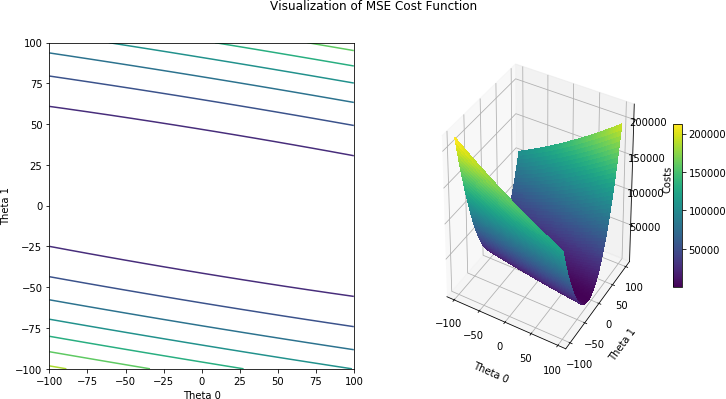

In [ ]:
def create_cost_plt_data(x, y, hypothesis_func, cost_func, interval, num_samples, x_offset=0., y_offset=0.):
    t0 = np.linspace(-interval+x_offset, interval+x_offset, num=num_samples)
    t1 = np.linspace(-interval+y_offset, interval+y_offset, num=num_samples)
    T0, T1 = np.meshgrid(t0, t1) 
       
    ### initilize cost matrix and cost function
    C = np.zeros([len(t0),len(t1)])

    ### calculate cost for each pair of the grid
    for i, t_0 in enumerate(t0):
        for j, t_1 in enumerate(t1):
            t_0 = torch.tensor([[t_0]])
            t_1 = torch.tensor([[t_1]])
            preds = hypothesis_func(x, t_0, t_1)
            loss = mse(preds, y)
            C[j][i] = loss.detach().numpy()
            
    return T0, T1, C

def create_cost_plt(T0, T1, Costs):
    ### contour plot
    fig = plt.figure(figsize=(16,6))
    fig.suptitle('Visualization of MSE Cost Function')
    ax = fig.add_subplot(1, 2, 1)
    ax.contour(T0, T1, C)
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')

    ### surface plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    surf = ax.plot_surface(T0, T1, C, rstride=1, cstride=1, cmap='viridis', linewidth=0, antialiased=False)
    ax.set_xlabel('Theta 0', labelpad=9)
    ax.set_ylabel('Theta 1', labelpad=9)
    ax.set_zlabel('Costs', labelpad=9)
    fig.colorbar(surf, shrink=0.5)

In [ ]:
T0, T1, C = create_cost_plt_data(X_tensor, y_tensor, hypothesis, mse, 100, 100)
create_cost_plt(T0, T1, C)

### Better do Feature Scaling

It seems, the error surface is not very balanced between $\theta_0$ and $\theta_1$. Scaling our features should help here.

**Task:**

Scale the features, so they are in the range of $-1$ to $+1$:

$$
X_{scaled} = \frac{X - \mu}{std(X)}
$$

with:

* the mean of our features $\mu$
* the standard deviation of our features $std(X)$

If everything is correct, the new plot should look more balanced:

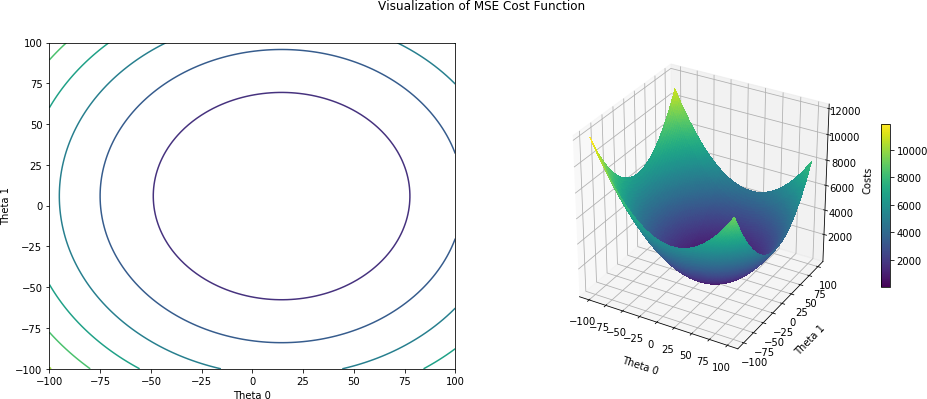

In [ ]:
def scale_features(x):
    
    ###############################
    ##### YOUR SOLUTION START #####
    ###############################
    
    raise NotImplementedError()
    
    ###############################
    ##### YOUR SOLUTION End   #####
    ###############################  


In [ ]:
X_tensor = scale_features(X_tensor)

T0, T1, C = create_cost_plt_data(X_tensor, y_tensor, hypothesis, mse, 100, 100)
create_cost_plt(T0, T1, C)

## Computing the Gradient

Remember the argument `requires_grad=True`, when initializing our tensors `theta_0` and `theta_1`?

This means we can call `backward()` on tensors, where `theta_0` and `theta_1` were used in the computation.
After calling `backward()` on `loss` we can access the partial derivatives of `theta_0` and `theta_1`.

**Recap:**

Why computing the gradient? Short: `theta_1.grad` and `theta_0.grad` tell us the steepness of the cost surface plot above for current values of $\theta_0$ and $\theta_1$, so we know in which direction we have to adjust $\theta_0$ and $\theta_1$ in order to reduce the cost and make our model fit better to the data.

In [ ]:
### make preictions for current thetas
predictions  = hypothesis(X_tensor, theta_0, theta_1)
### calculate the loss forwards and backwards
loss = mse(predictions, y_tensor)
loss.backward()

### computation of new gradients disabled inside the context
with torch.no_grad():
    print(theta_1.grad)
    print(theta_0.grad)
    print(X_tensor.grad) # prints None, because we did not specify requires_grad=True
    print(y_tensor.grad) # see above
    
    ### reset the gradient, else the gradient accumulates
    theta_1.grad.zero_()
    theta_0.grad.zero_()

## Training the Model

### Gradient Descent 

**Task:**

Implement the funtion to train the model with gradient descent by making use of the code snippet above:

- (1) Make prediction, calculate the loss forwards and backwards.
- (2) Implement the gradient descent _update rule_.

**Reminder:**

Equation for the _update rule_:

$$
\theta_j'  = \theta_j - \alpha \cdot  \frac{\partial}{\partial \theta_j} J(\vec\theta)
$$

with
- the cost $J(\vec\theta)$ (here our Mean-Squared-Error)
- the partial derivative of one theta $\frac{\partial}{\partial \theta_j} J(\vec\theta)$
- a learning rate $\alpha$

**Note**

In your implementation for the update rule only use $x -= update$ instead of $ x = x - update$ to avoid PyTorch errors.

In [ ]:
def train_model(X, y, hypothesis_func, cost_func, theta_0, theta_1, epochs=100, learning_rate=0.1):

    ### History to keep track of everything for later evaluation
    cost_hist = []
    theta_1_hist = []
    theta_0_hist = []
    theta_1_grad_hist = []
    theta_0_grad_hist = []
    
    ### Iteratively apply gradient descent
    for i in range(epochs):

        ###############################
        ##### YOUR SOLUTION START #####
        ###############################
        ##
        ## Task (1): Make prediction, calculate the loss forwards and backwards.
        ##

        raise NotImplementedError()

        ###############################
        ##### YOUR SOLUTION End   #####
        ###############################    


        ### computation of new gradients disabled inside the context
        with torch.no_grad():
            
            ### Keep track of everything for later purpose, don't care about this
            cost_hist.append(cost_func(hypothesis_func(X, theta_0, theta_1), y))
            theta_1_hist.append(np.copy(theta_1.detach().numpy()))
            theta_0_hist.append(np.copy(theta_0.detach().numpy()))
            theta_1_grad_hist.append(np.copy(theta_1.grad.detach().numpy()))
            theta_0_grad_hist.append(np.copy(theta_0.grad.detach().numpy()))

            ###############################
            ##### YOUR SOLUTION START #####
            ###############################
            ##
            ## Task (2): Update theta_0 and theta_1 and reset the gradient
            ##

            raise NotImplementedError()

            ###############################
            ##### YOUR SOLUTION End   #####
            ###############################
    
    return cost_hist, theta_0_hist, theta_1_hist, theta_0_grad_hist, theta_1_grad_hist

In [ ]:
### hyperparameters
learning_rate = 1e-1
epochs = 100

### let us just recreate new thetas each time.
### so while testing your implementation you have always fresh parameters
theta_0 = torch.randn(1, requires_grad=True, dtype=torch.float32)
theta_1 = torch.randn(1, 1, requires_grad=True, dtype=torch.float32)



eval_data = train_model(X_tensor, y_tensor, hypothesis, mse, theta_0, theta_1, 
                        epochs=epochs, learning_rate=learning_rate)

cost_hist, theta_0_hist, theta_1_hist, theta_0_grad_hist, theta_1_grad_hist = eval_data

## Evaluation

### Plot Model Progession over Epochs

As we kept track of our model parameters $\theta_0$ and $\theta_1$, we can now plot how our model got adjusted during training. If learning was successfull, the plot could look like the following:

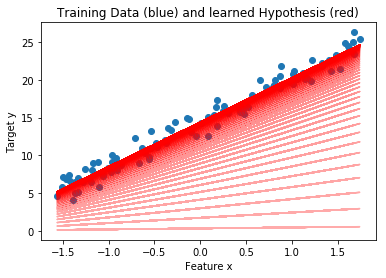

Light red hypothesis means early in training. The darker the red, the later the model.

In [ ]:
plt.scatter(X_tensor,y_tensor)

n_steps = 100
step = epochs // n_steps
for i in range(len(cost_hist[0::step])):
    y_pred = hypothesis(X_tensor.numpy(), theta_0_hist[i*step], theta_1_hist[i*step])
    a = i / (n_steps*1.5) + 0.33
    plt.plot(X_tensor.numpy(), y_pred, color='r', alpha=a)
    
plt.title('Training Data (blue) and learned Hypothesis (red)')
plt.xlabel('Feature x')
plt.ylabel('Target y')

### Plot Cost and Gradient over Epochs

Let us also plot Costs and the Gradient $\nabla J(\theta)$, i.e. $\frac{\partial}{\partial \theta_0} J(\theta)$ and $\frac{\partial}{\partial \theta_1} J(\theta)$ and how it evolved during the training process.

If learning was successfull, all three should get closer to zero at the end of the training. The plot could look like the following:

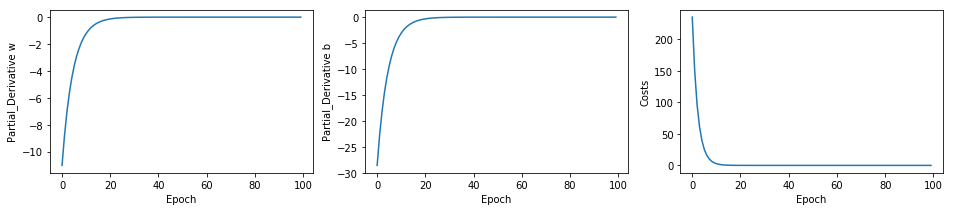

In [ ]:
plt.figure(figsize=(16,3))

ax1 = plt.subplot(131)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Partial_Derivative theta_1')
ax2 = plt.subplot(132)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Partial_Derivative tehta_0')
ax3 = plt.subplot(133)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Costs')

ax1.plot(np.arange(0, len(cost_hist)), np.array(theta_1_grad_hist).flatten())
ax2.plot(np.arange(0, len(cost_hist)), np.array(theta_0_grad_hist).flatten())
ax3.plot(np.arange(0, len(cost_hist)), cost_hist)

print("smallest_costs: {}".format(np.array(cost_hist).min()))

### Using PyTorchs Built-Ins

Until now we only used tensors and the autograd feature of PyTorch and implemented our own functions for the linear hypothesis, the costs and the update rule.

This is extremely valuable for learning the concepts of algorithms aswell as testing out own ideas or implementations of state-of-the-art papers, which are not covered by the well established algorithms.

On the other side, when building complex models, like very deep neural networks, this can become tedious. For this purpose PyTorch provides built-ins for a variety of functions. One of them is `torch.nn.Linear`, which can be used to implement our linear hypothesis:

$$h_{\theta}(x) = \theta_0 + \theta_1 \cdot x$$

**Task:**

- Implement the class `LinearRegression`, which uses `torch.nn.Linear` for our hypothesis.
- Add `torch.nn.Linear` as a class member in the constructor, e.g. `self.linear = torch.nn.Linear(...)`
- Apply the linear function onto `x` in the forward method and return the resutl.

In [ ]:
#######################################
### Using built-in linear function ####
#######################################

class LinearRegression(nn.Module):  # inheriting from nn.Module!

    def __init__(self):
        super(LinearRegression, self).__init__()
        
        ###############################
        ##### YOUR SOLUTION START #####
        ###############################
        ##
        ## Task (1): add torch.nn.Linear as a class-member
        ##

        raise NotImplementedError()

        ###############################
        ##### YOUR SOLUTION End   #####
        ############################### 
        
    def forward(self, x):
        ###############################
        ##### YOUR SOLUTION START #####
        ###############################
        ##
        ## Task (2): call the member function on x and return the result
        ##

        raise NotImplementedError()

        ###############################
        ##### YOUR SOLUTION End   #####
        ############################### 

#### Computing the Gradient

To get the gradient, the process is almost the same. The only difference is, that we did not explicitly create our model parameters. So in order to get them, we call `parameters()` of our model object.

In [ ]:
### we can now create our model.
### and then gon, almost as beore
model = LinearRegression()
preds = model(X_tensor)   
loss = mse(preds, y_tensor)
loss.backward()

### computation of new gradients disabled inside the context
with torch.no_grad():
    for param in model.parameters():
        print('param: ', param)
        p_grad = param.grad.data
        print('param grad: ', p_grad)
        print()
        p_grad.zero_() ### reset the gradient, else the gradient accumulates


#### Training the new model

**Task:**

Implement the function to train our new model. Again, just make use of the code snippet above and insert the code at the correct positions.

In [ ]:
def train_model_new(X, y, model, cost_func, epochs=100, learning_rate=0.1):

    ### History of costs
    cost_hist = []
    
    ### Iteratively apply gradient descent
    for i in range(epochs):

        ###############################
        ##### YOUR SOLUTION START #####
        ###############################
        ##
        ## Task (1): Make predition, calculate the loss forwards an backwards.
        ##
                
        return NotImplementedError()
            
        ###############################
        ##### YOUR SOLUTION End   #####
        ###############################    

        ### Keep track of everything for later purpose, don't care about this
        cost_hist.append(cost_func(model(X), y))
        
        
        ### computation of new gradients disabled inside the context
        with torch.no_grad():
            for param in model.parameters():
                
                ###############################
                ##### YOUR SOLUTION START #####
                ###############################
                ##
                ## Task (2): Update theta_0 and theta_1 and reset the gradient
                ##
                
                return NotImplementedError()
            
                ###############################
                ##### YOUR SOLUTION End   #####
                ###############################
    
    return cost_hist

In [ ]:
# Hyperparameters
learning_rate = 1e-1
epochs = 100

### create a new model only once before training
model = LinearRegression()

### start training
cost_hist = train_model_new(X_tensor, y_tensor, model, mse, epochs=epochs, learning_rate=learning_rate)

### plot the costs over epochs
plt.plot(np.linspace(0,epochs, epochs), cost_hist)
plt.xlabel('Epoch')
plt.ylabel('Costs')

### More PyTorch Built-Ins

After making use of `torch.nn.Linear`, there is more we can exchange for PyTorch built-ins. The cost and the updates of our parameters.

**Task:**

Write the code to train a new model:

* Create a new model object before the training.
* Use the built-in for the Mean-Squared-Error loss `torch.nn.MSELoss()`:
  * Create an object once before the training, e.g. `criterion = torch.nn.MSELoss()`.
  * Calling it will give you a tensor, e.g. `loss = criterion(y_tensor, predictions)`.
  * You an call `backward()` on that tensor too.
* Also use a built-in optimizer, e.g. `torch.optim.Adam`:
  * Create an object once before the training providing your `model.parameters()` and a learning rate as argument.
  * Use its functions `step()` and `zero_grad()` to update the parameters, resp. to reset the gradient.
* Keep track of the costs in each epoch to plot them afterwards.

**Optionally:**

* Also plot the data together with the hypothesis of epoch like seen before.
* *Hint:* You do not have to store the models parameters. You can just plot the models during training.

**General Hint:** 
* Of couse you also do not have to implement all of this in a function plain code is ok if it does the job.

In [ ]:
###############################
##### YOUR SOLUTION START #####
###############################
##
## Task (1): Train your model using the classes and functions mentioned
##
## Task (2): Plot the history of the costs afterwards
##
## Task (3): Optionally plot the data with the hypothesis of each epoch like seen before.


###############################
##### YOUR SOLUTION End   #####
###############################    

## Summary and Outlook

During this exercise, fundamental elements of Machine Learning were covered. You should be able to answer the following questions:
- What is a model using the example of a linear function as a hypothesis?
- How do you quantify a model?
- What is the gradient descent algorithm and what is its used for in the context of Machine Learning?
- Can you explain the concept of hyperparameters and name some?

Also you should have learned how to implement your own functions with PyTorch, how to make use of PyTorchs autograd feature and how to use PyTorchs built-ins for functions, costs and optimizers.

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g., images).*

Exercise: Simple Linear Regression with PyTorch <br/>
by Christian Herta, Benjamin Voigt, Klaus Strohmenger <br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christian Herta, Benjamin Voigt, , Klaus Strohmenger

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.